# EECS 738 Homework 1

## 1. INDUSTRY

Botanical and beverage industry is chosen.

## 2. SOURCE

__2.1. SOURCE__: The dataset is from [UCI Machine Learning Database](https://archive.ics.uci.edu/ml/index.php).

__DESCRIPTION__: The dataset contains about one hundred fify data with attributes related to sepal, petal and species. The following attributes are from the dataset.

|Attribute       | Datatype     |
| :------------- | ----------: |
| Id | int64   |
| SepalLengthCm   | float64 |
|SepalWidthCm| float64|
|PetalLengthCm| float64|
|PetalWidthCm | float64|
|Species|object||

__2.2. SOURCE__: The dataset is from [UCI Machine Learning database](https://archive.ics.uci.edu/ml/index.php).

__DESCRIPTION__: The dataset contains about two thousand data with attributes related to red wine quality. The following attributes are from the dataset.

|Attribute       | Datatype     |
| :------------- | ----------: |
|fixed acidity     |      object|
|volatile acidity   |     object|
|citric acid         |    object|
|residual sugar       |   object|
|chlorides             |  object|
|free sulfur dioxide    | object|
|total sulfur dioxide    |object|
|density                 |object|
|pH                      |object|
|sulphates               |object|
|alcohol                 |object|
|quality                 |object||

### __3. MODELS FOR THE DATASETS__

__3.1.__ To perform k-means clustering using an user defined function with number of clusters, features and iterations as arguments.

__3.2.__ To perform histogram analysis using an user defined function to understand data distribution.

### 4. Importing libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import secrets
import csv
import seaborn as sns

### 5. K-Means Clustering Function

### 5.1. Finding Centroid for K-Means clustering

In [72]:
def find_centroid(count,data,num_clusters):
     if count==0:
        secure_random = secrets.SystemRandom()      
        to_group = list(data.index)               
        num_of_groups = num_clusters
        list_of_random_items = secure_random.sample(to_group, num_of_groups)
        #print(list_of_random_items)
        centroids=np.array(data.loc[list_of_random_items])
        #print(centroids[0])
        return centroids
     else:
        centroids_mean=data.groupby(['cluster']).mean()
        centroids=np.array(centroids_mean)
        #print(centroids[0])
        return centroids

### 5.2. K-Means Clustering with number of clusters, features and iterations as function arguments

In [73]:
def k_means_manual(num_clusters, features,iterations):  
    df=features;
    count_centroid=0
    while count_centroid<iterations:
        centroids=find_centroid(count_centroid,df,num_clusters)
        #print(centroids)
        df = df.drop(['cluster'], axis=1, errors='ignore')
        df_arr=np.array(df)
        #print(df_arr)
        for k in range(0,len(centroids)):
            col_name="centroid_"+str(k+1)
            df[str(col_name)]=""
            #print(centroids[k])
            for i in range(0,len(df)):
                df.loc[i,col_name]=np.sqrt(sum((df_arr[i]-centroids[k])**2))
        centroids_cols = [col for col in df.columns if "centroid_" in col]
        #print(list(centroids_cols))
        df_centroids=df.loc[:, df.columns.isin(centroids_cols)]
        #print(df_centroids.head())
        #print(df_centroids.dtypes)
        df_centroids = df_centroids.apply(pd.to_numeric, errors='coerce')
        df_centroids["min"] = df_centroids.idxmin(axis=1, skipna=True) 
        #print(df_centroids.head())
        df_centroids["min"]=df_centroids["min"].astype(str)
        #print(df_centroids.dtypes)
        df_centroids["min"]=df_centroids["min"].str[9:]
        #print(df_centroids.head())
        for k in range(0,len(centroids)):
            col_name="centroid_"+str(k+1)
            del(df[col_name])
        df["cluster"]=df_centroids["min"].astype(int)
        #print(df.head())
        #print(df.groupby(['cluster']).mean())
        count_centroid=count_centroid+1
        print('\n Centroids: '+ str(centroids))
        plt.figure(figsize=(20,10))
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='blue',marker='X')
        plt.scatter(df.iloc[:, 0],df.iloc[:, 1],color='grey',alpha=0.5)
        plt.title("n = "+str(count_centroid))
        plt.show()
        print('\n')

### 6. Histogram function with data and title as arguments

In [74]:
def histogram_manual(data, title):  
    df=list(data);
    unique_values = []
    unique_values_count=[]
    for x in data:
        if x not in unique_values:
            unique_values.append(x)
    #print(unique_values)
    for y in unique_values:
        count=0
        for x in data:
            if x == y:
                count=count+1;
        unique_values_count.append(count)
    #print(unique_values_count)
    plt.figure(figsize=(20,10))
    plt.bar(unique_values, unique_values_count, 0.05)
    plt.title("Histogram for "+str(title))
    plt.xlabel("Values")
    plt.ylabel("Frequency")

## 7. Loading, Preparing and Visualizing the dataset 1

### 7.1. Importing dataset 1

In [75]:
df_1 = pd.read_csv('Iris.csv')
df_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 7.2. Understanding the data types in the dataset

In [76]:
print(df_1.dtypes)
print('Dimension before data cleaning'+str(df_1.shape))
df_1.dropna()
print('Dimension before data cleaning'+str(df_1.shape))

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Dimension before data cleaning(150, 6)
Dimension before data cleaning(150, 6)


### 7.3. Jointplot of sepal length and sepal width

<Figure size 2160x3600 with 0 Axes>

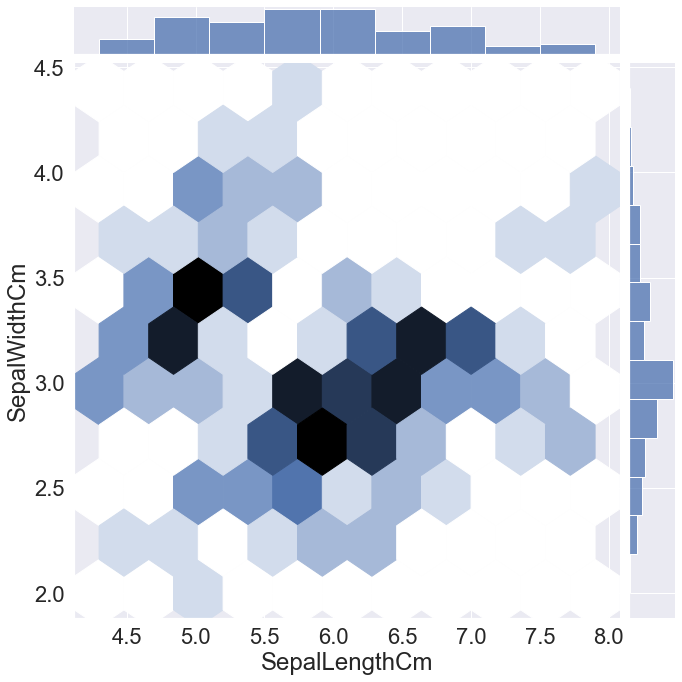

In [77]:
plt.figure(figsize=(30,50))
graph=sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df_1, kind="hex",height=10, ratio=10);
graph.x = df_1['SepalLengthCm']
graph.y = df_1['SepalWidthCm']

There are more flowers with sepal length 6 to 6.5 cm and sepal width 2.5 to 3 cm.

### 7.4. Jointplot of petal length and petal width

<Figure size 2160x3600 with 0 Axes>

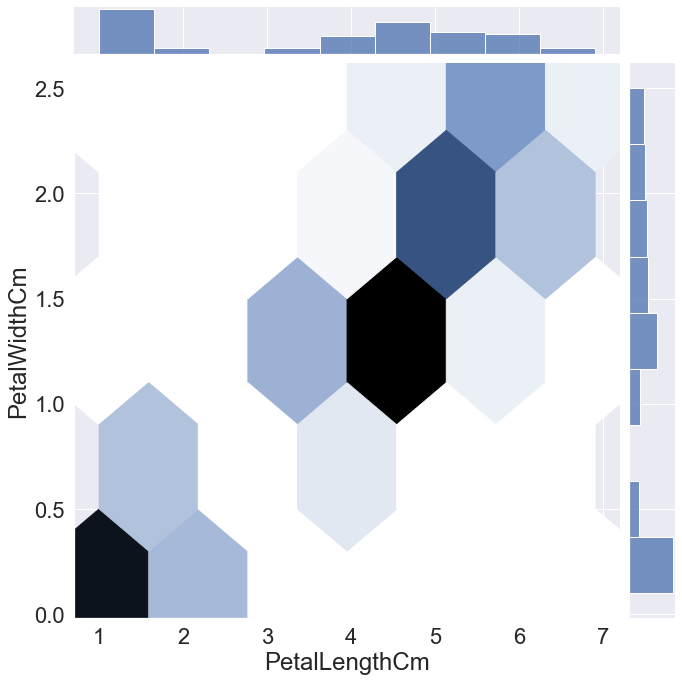

In [78]:
plt.figure(figsize=(30,50))
graph=sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df_1, kind="hex",height=10, ratio=10);
graph.x = df_1['PetalLengthCm']
graph.y = df_1['PetalWidthCm']

There are more flowers with 
1. petal length 4 to 5cm and petal width 1 to 1.5 cm
2. petal length 0 to 1.5cm and petal width 0 to 0.5 cm

## 8. K-Means and Histogram for dataset 1

### 8.1 Feature Extraction for K_Means


 Centroids: [[3.4 1.6 0.2]
 [2.5 5.8 1.8]
 [3.2 5.7 2.3]
 [2.9 4.6 1.3]
 [3.6 1.  0.2]]


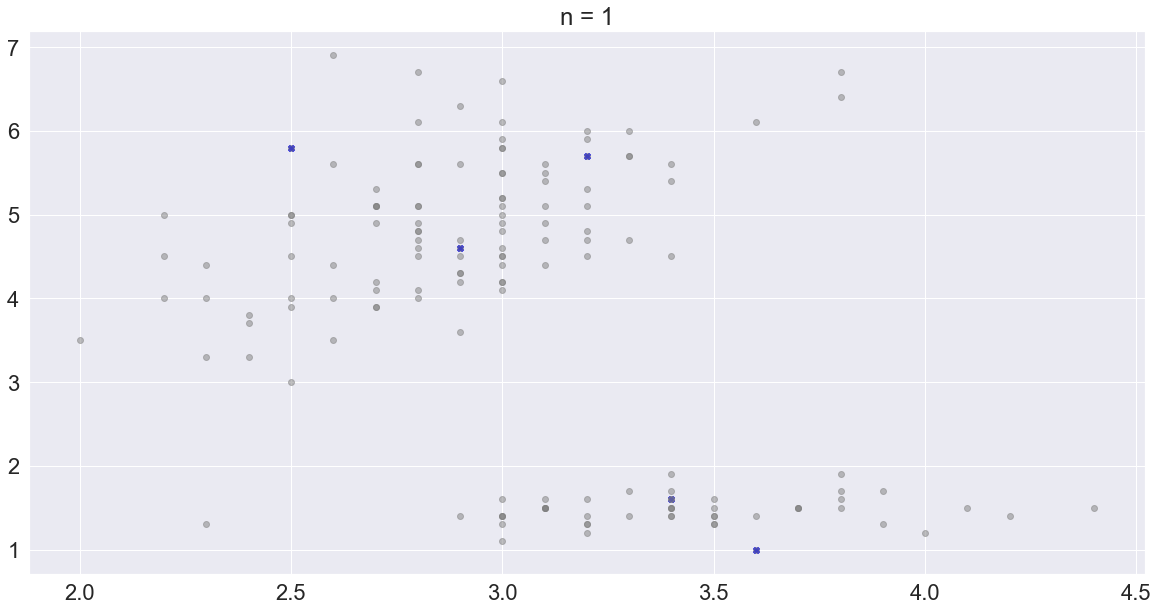




 Centroids: [[3.3627907  1.5        0.24418605]
 [2.70769231 5.71538462 1.86153846]
 [3.16785714 5.68928571 2.19285714]
 [2.76779661 4.3559322  1.38983051]
 [3.75714286 1.24285714 0.24285714]]


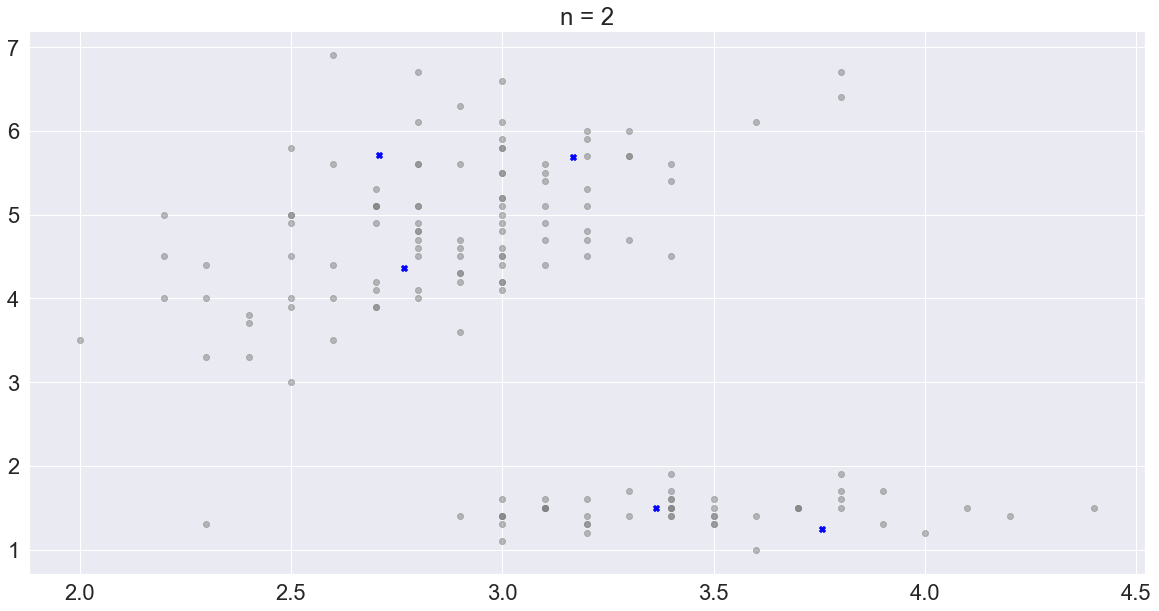




 Centroids: [[3.24166667 1.46944444 0.23611111]
 [2.75263158 5.59473684 1.85263158]
 [3.204      5.704      2.212     ]
 [2.76428571 4.31607143 1.37678571]
 [3.87142857 1.45       0.26428571]]


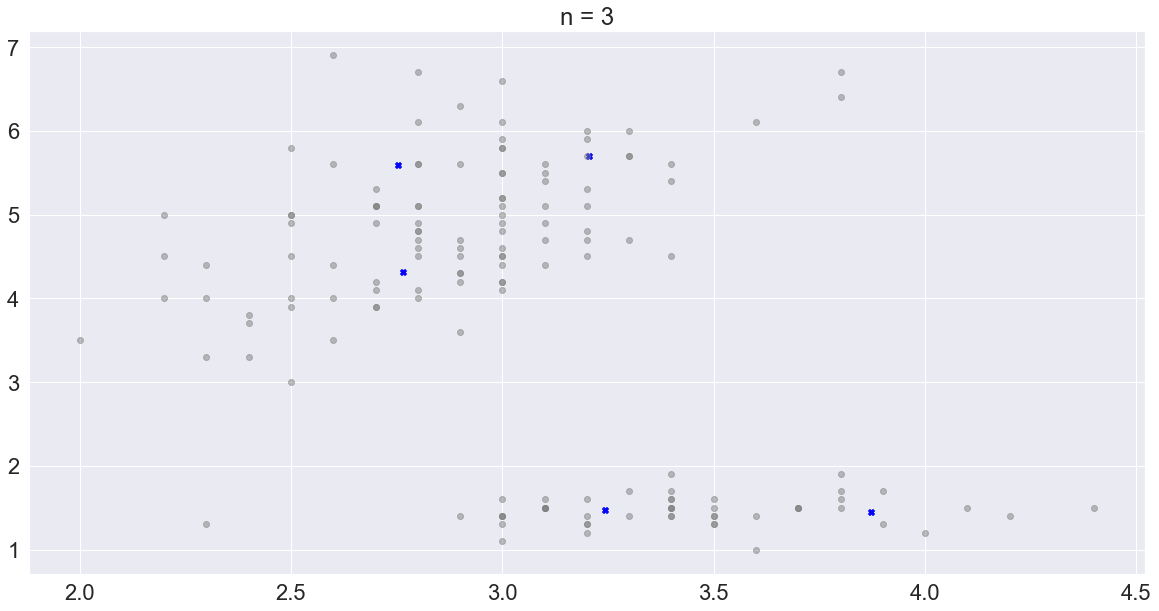

In [79]:
features= df_1[df_1.columns[2:5]]
features
k_means_manual(5,features,3)

### 8.2 Histogram for data visualization

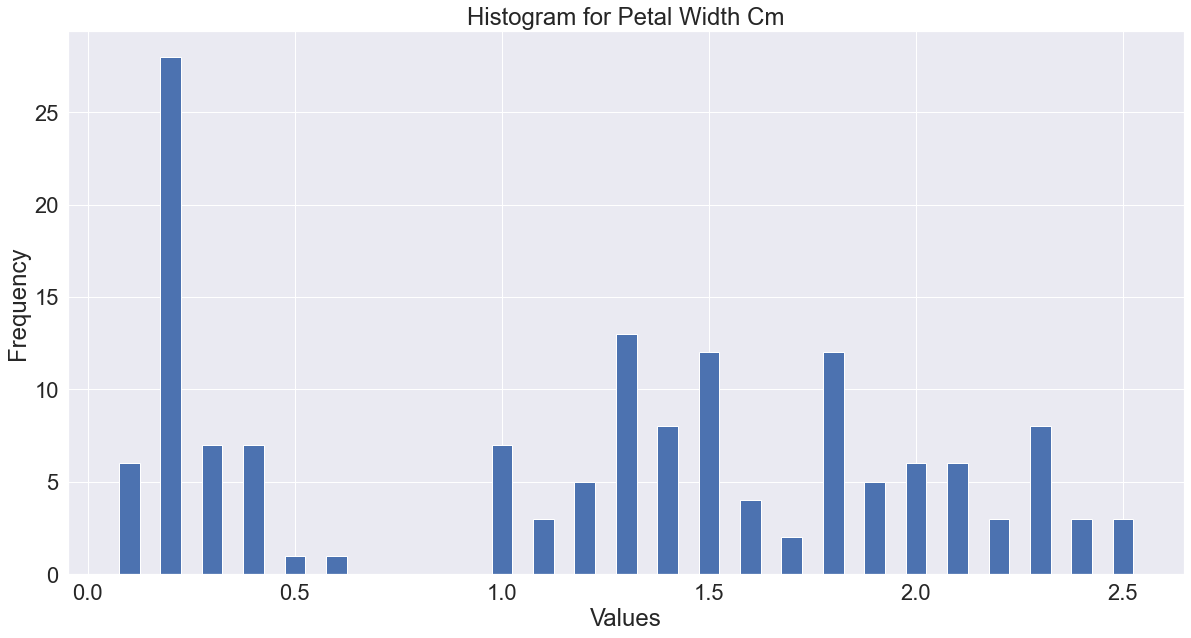

In [80]:
histogram_manual(df_1["PetalWidthCm"],"Petal Width Cm")

## 9. Loading, Preparing and Visualizing the dataset 2

### 9.1 Importing dataset 2

In [81]:
with open('winequality-red.csv', 'r') as file:
    reader = csv.reader(file, delimiter=";")
    df_2=pd.DataFrame(reader) 
df_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


### 9.2 Correcting the column header

In [82]:
column_header = df_2.iloc[0] 
df_2 = df_2[1:] 
df_2.columns = column_header 
df_2=df_2.reset_index()
del(df_2["index"])
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


### 9.3. Understanding the data types in the dataset

In [83]:
print(df_2.dtypes)
print('Dimension before data cleaning'+str(df_2.shape))
df_2.dropna()
print('Dimension before data cleaning'+str(df_2.shape))

0
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object
Dimension before data cleaning(1599, 12)
Dimension before data cleaning(1599, 12)


### 9.4. Making the datatypes to numeric

In [84]:
df_2=df_2.apply(pd.to_numeric)
print(df_2.dtypes)

0
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### 9.5. Heatmap of sugar, density and pH

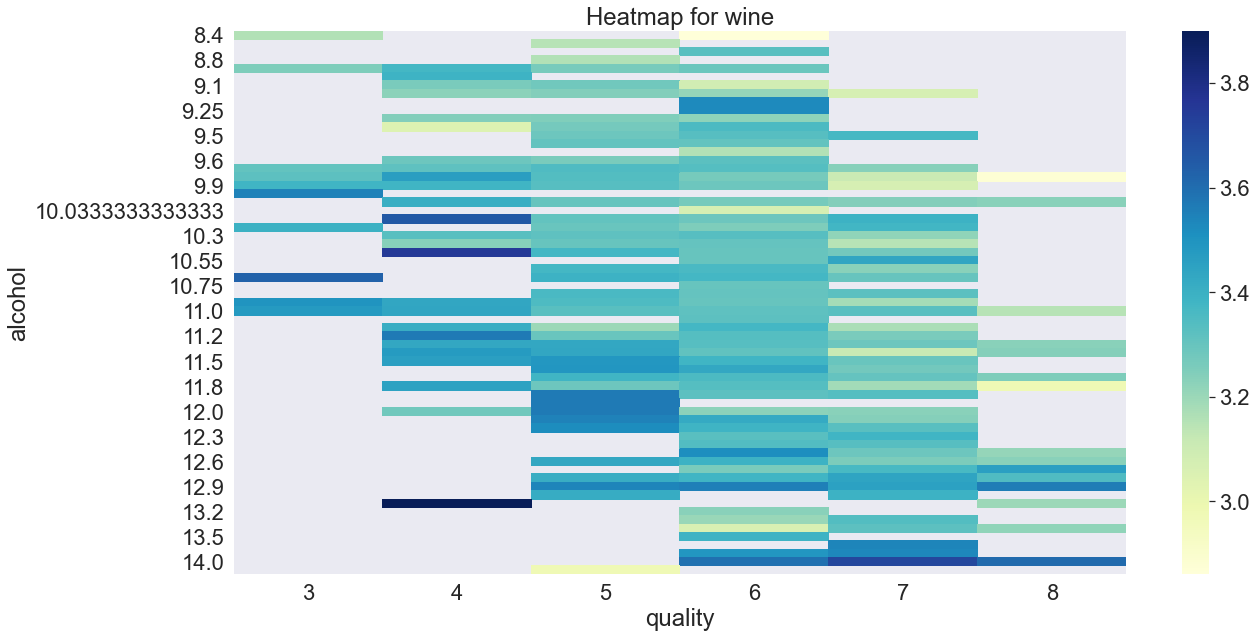

In [85]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2) 
alcohol_data = pd.pivot_table(df_2, values='pH', 
                     index=['alcohol'], 
                     columns='quality')
sns.heatmap(alcohol_data, cmap="YlGnBu").set_title('Heatmap for wine');

1. Wine with high quality always has alcohol level more than 9.6.
2. Wine with highest alcohol is average quality.

## 10. K-Means and Histogram for dataset 2

### 10.1 Feature Extraction for K_Means


 Centroids: [[9.2     0.9998 ]
 [8.7     0.9954 ]
 [9.7     0.9979 ]
 [7.9     0.9964 ]
 [6.9     0.99438]]


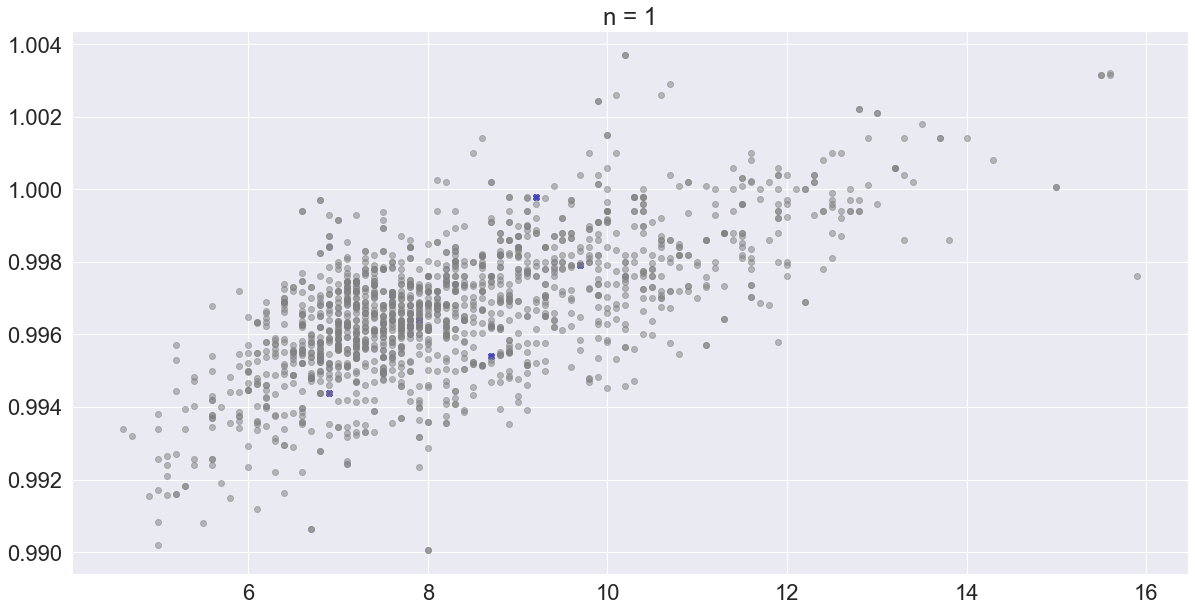




 Centroids: [[ 9.17727273  0.99741373]
 [ 8.65823529  0.99682076]
 [10.93977591  0.99857588]
 [ 7.82447059  0.99651249]
 [ 6.6867784   0.99555587]]


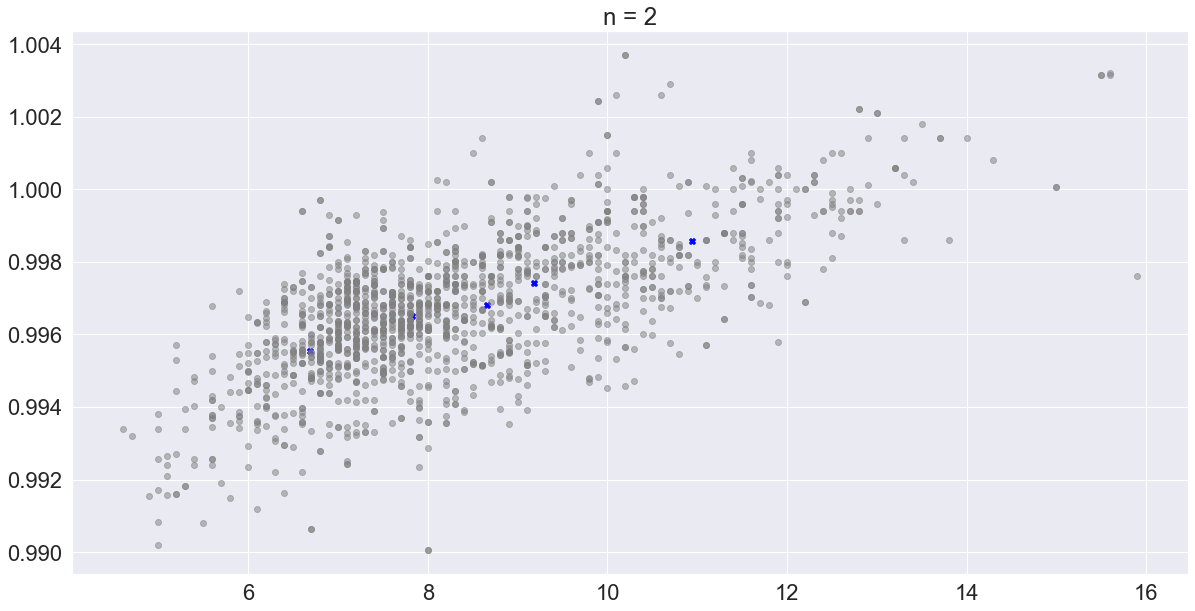




 Centroids: [[ 9.47383178  0.99772874]
 [ 8.6         0.99693502]
 [11.41343874  0.99878715]
 [ 7.73024831  0.99638447]
 [ 6.62098765  0.99550352]]


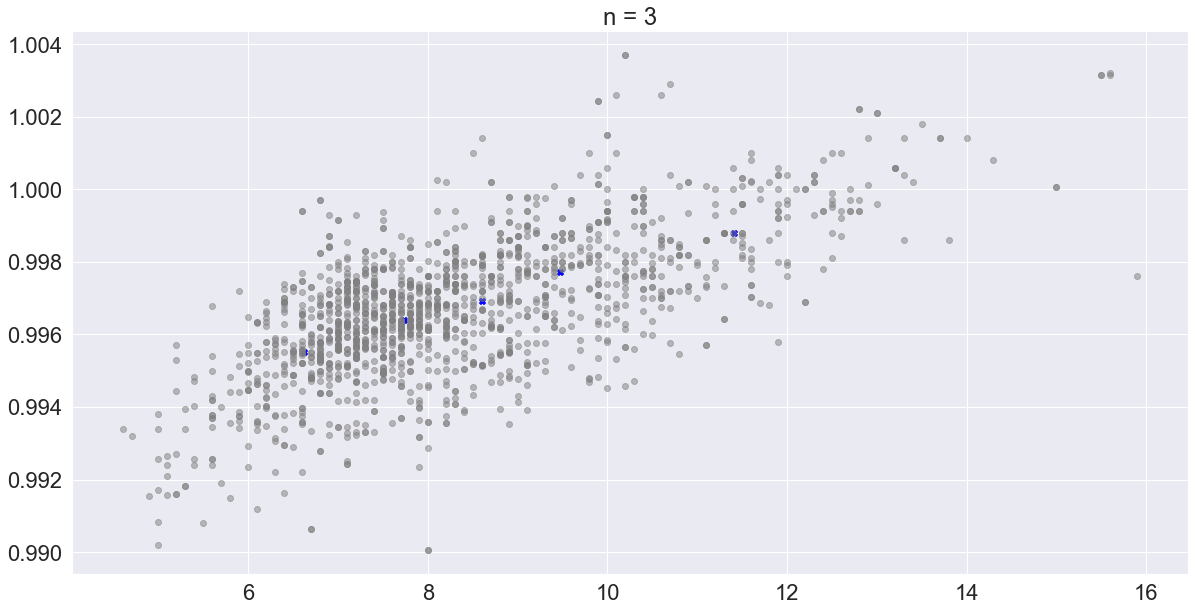

In [86]:
features= df_2[['fixed acidity','density']]
features
k_means_manual(5,features,3)

### 10.2. Histogram for data visualization

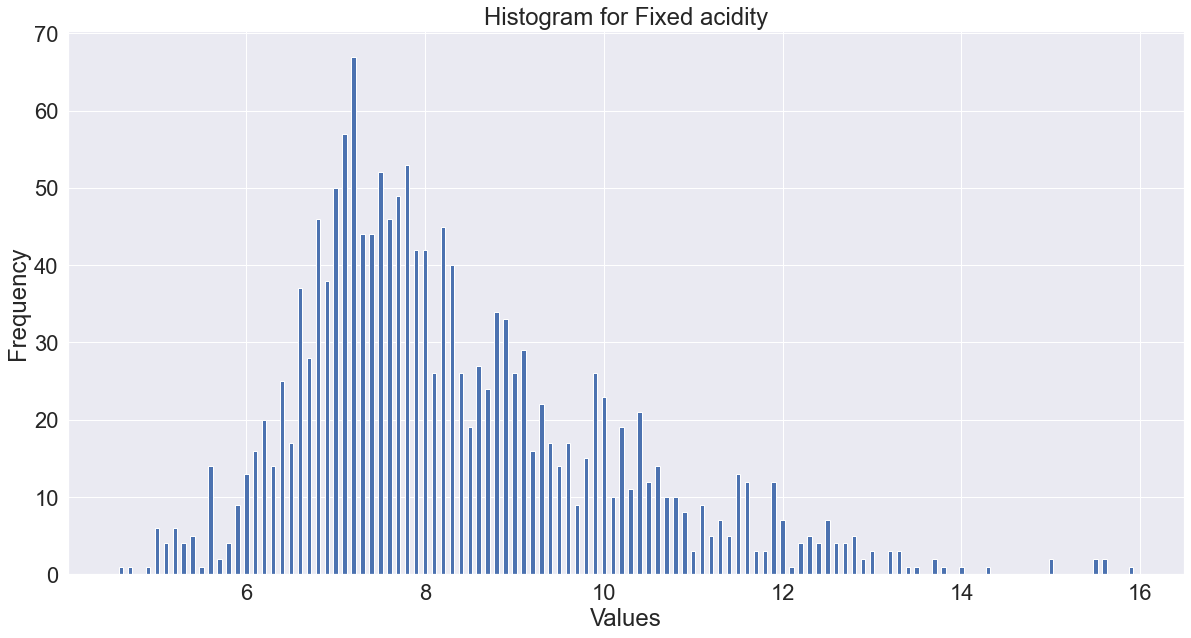

In [87]:
histogram_manual(df_2["fixed acidity"],"Fixed acidity")